In [7]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

# Set figure stile and size for entire notebook
sns.set_context('talk', font_scale=1)
plt.style.use(['dark_background'])

sns.set_context('talk')
plt.style.use(['dark_background'])
#plt.rcParams['image.cmap'] = "orangered"
plt.rcParams.update({'font.sans-serif':'Helvetica'})


In [8]:
# Import Data

#data = pd.read_csv('data/data_prep_reg.csv', index_col=[0])
#data = pd.read_csv('data/data_prep_feat.csv', index_col=[0])
data = pd.read_csv('data/data_prep_reg_all.csv', index_col=[0])

print(f'Data: {data.shape}')


Data: (15539, 44)


In [9]:
#fillna
data = data.fillna(data.mean())

In [10]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,2,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
2,0,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,...,0.342484,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833
3,0,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,...,0.336701,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000
4,0,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,...,0.181690,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833


In [11]:
columns_to_drop = ['target', 'location']
# define features and target
X = data.drop(columns_to_drop, axis=1)
y = data.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (15539, 42)
y: (15539,)
X_train: (10877, 42)
y_train: (10877,)
X_test: (4662, 42)
y_test: (4662,)


## Linear Regression

In [12]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Instantiate our model 
lin_reg = LinearRegression()
lin_reg_scaled = LinearRegression()
# Train the model using our data
lin_reg.fit(X_train, y_train)
lin_reg_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

y_pred_train_scaled = lin_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = lin_reg_scaled.predict(X_test_scaled)

In [15]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
  
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-200, 350], [-200, 350], color="white")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-200, 350], [0,0], color="white")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [16]:
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

rsme_lin_reg_train_scaled = rmse(y_train, y_pred_train_scaled )
rsme_lin_reg_test_scaled = rmse(y_test, y_pred_test_scaled )

print(f'RSME _ train_scaled: {rsme_lin_reg_train_scaled:.2f}')
print(f'RSME _ test_scaled: {rsme_lin_reg_test_scaled:.2f}')

RSME _ train: 38.99
RSME _ test: 39.01
RSME _ train_scaled: 39.00
RSME _ test_scaled: 39.01


In [17]:
print(f' max coef: {max(lin_reg.coef_)}')
print(f' min coef: {min(abs(lin_reg.coef_))}')

 max coef: 1275.2542103146675
 min coef: 1.2529244308723264e-10


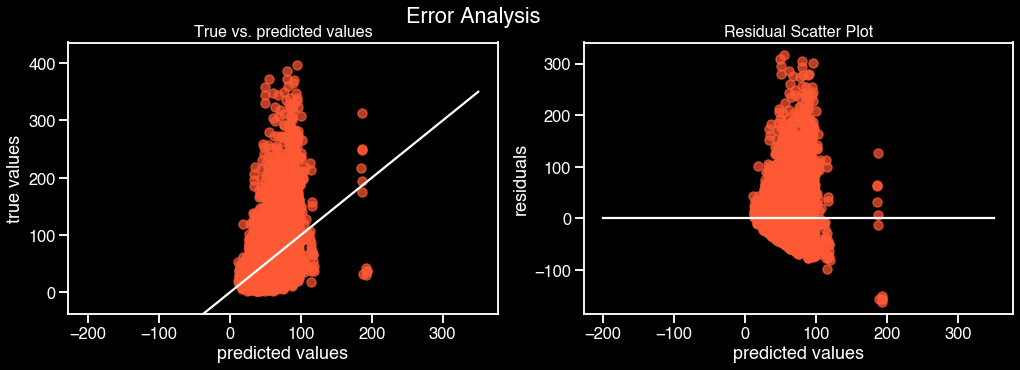

In [18]:
# error analysis train:
error_analysis(y_train, y_pred_train)

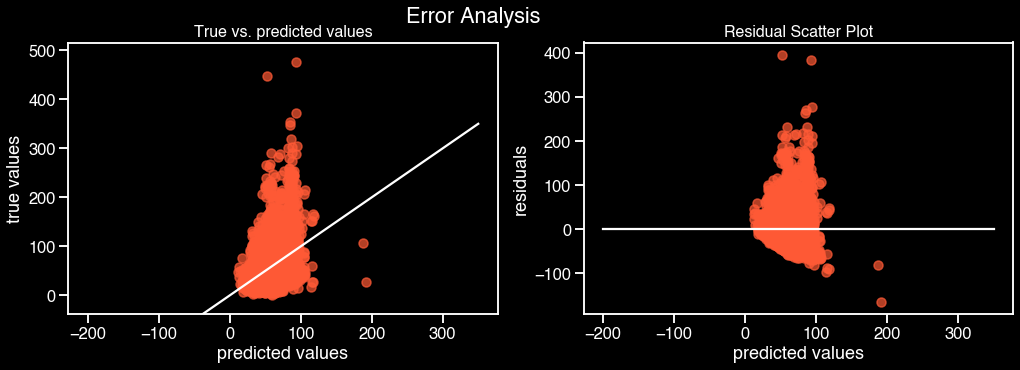

In [19]:
# error analysis test:
error_analysis(y_test, y_pred_test)

### Lasso


RSME _ train: 40.20
RSME _ test: 39.96


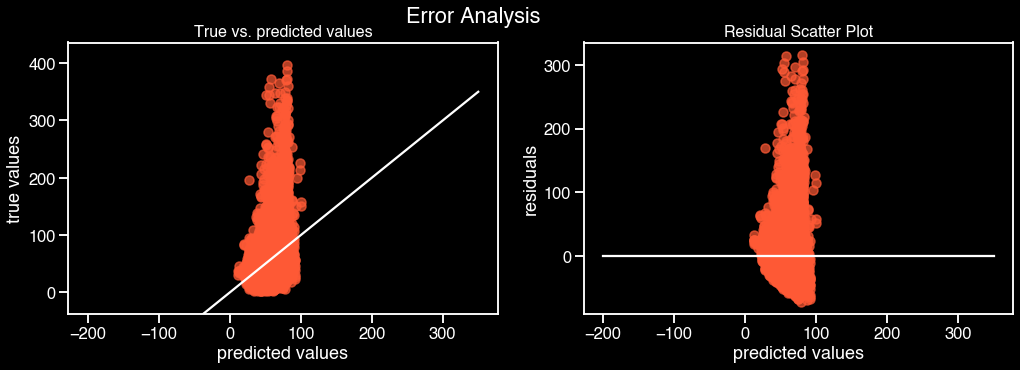

In [20]:
from sklearn.linear_model import Lasso

# Instantiate our model 
lasso_reg = Lasso()

# Train the model using our data
lasso_reg.fit(X_train, y_train)

# predict

y_pred_train = lasso_reg.predict(X_train)
y_pred_test = lasso_reg.predict(X_test)

rsme_lasso_reg_train = rmse(y_train, y_pred_train)
rsme_lasso_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_lasso_reg_train:.2f}')
print(f'RSME _ test: {rsme_lasso_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)


In [21]:
print(f' max coef: {max(lasso_reg.coef_)}')
print(f' min coef: {min(lasso_reg.coef_)}')

 max coef: 0.5824165202405027
 min coef: -18.401635215308488


### Ridge


RSME _ train: 39.17
RSME _ test: 39.13


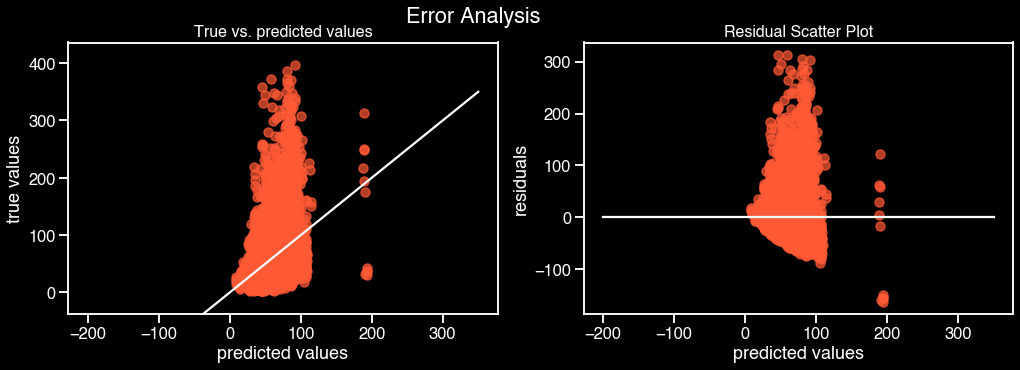

In [22]:
from sklearn.linear_model import Ridge

# Instantiate our model 
ridge_reg = Ridge()

# Train the model using our data
ridge_reg.fit(X_train, y_train)

# predict

y_pred_train = ridge_reg.predict(X_train)
y_pred_test = ridge_reg.predict(X_test)

rsme_ridge_reg_train = rmse(y_train, y_pred_train)
rsme_ridge_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_ridge_reg_train:.2f}')
print(f'RSME _ test: {rsme_ridge_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

### linear Regression on log y

In [23]:
y_log = np.log1p(y_train)


In [24]:
y_pred_train

array([72.80204911, 14.91332093, 66.08797552, ..., 35.39508054,
       63.14681945, 36.26513131])

RSME _ train: 40.51
RSME _ test: 40.45


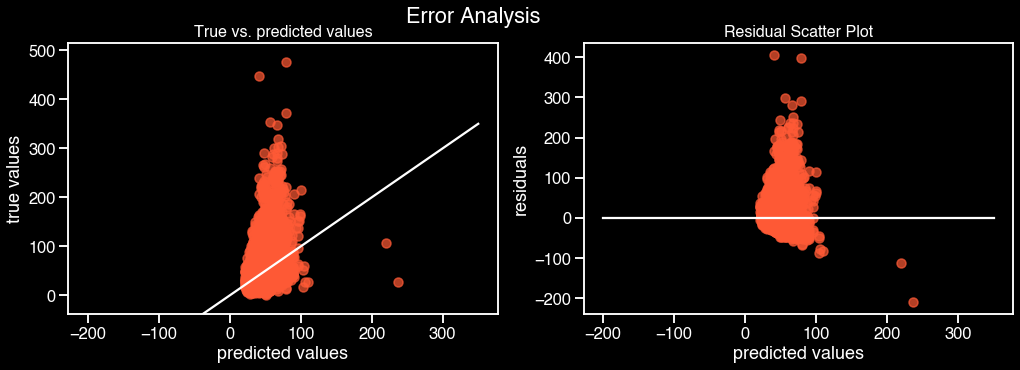

In [25]:
# Instantiate our model 
lin_log_reg = LinearRegression()

# Train the model using our data
lin_log_reg.fit(X_train, y_log) # y´= log(y+1)

# predict

y_pred_train_log = lin_log_reg.predict(X_train) # y = exp(y´) - 1
y_pred_train = np.expm1(y_pred_train_log)
y_pred_test_log = lin_log_reg.predict(X_test)
y_pred_test = np.expm1(y_pred_test_log)


rsme_lin_log_reg_train = rmse(y_train, y_pred_train )
rsme_lin_log_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_log_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_log_reg_test:.2f}')

# error analysis test:
error_analysis(y_test, y_pred_test)

# linear regression with polynomial features


In [26]:

# import to create polynomial features
from sklearn.preprocessing import PolynomialFeatures

# here we will add the second degree polynomial features
polynomial_features = PolynomialFeatures(degree=2, 
                        interaction_only=True,
                        include_bias=False)
x_poly_train = polynomial_features.fit_transform(X_train)   # shape (20,2) # x , x2
x_poly_test = polynomial_features.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)
y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

RSME _ train: 33.46
RSME _ test: 36.40
train
test


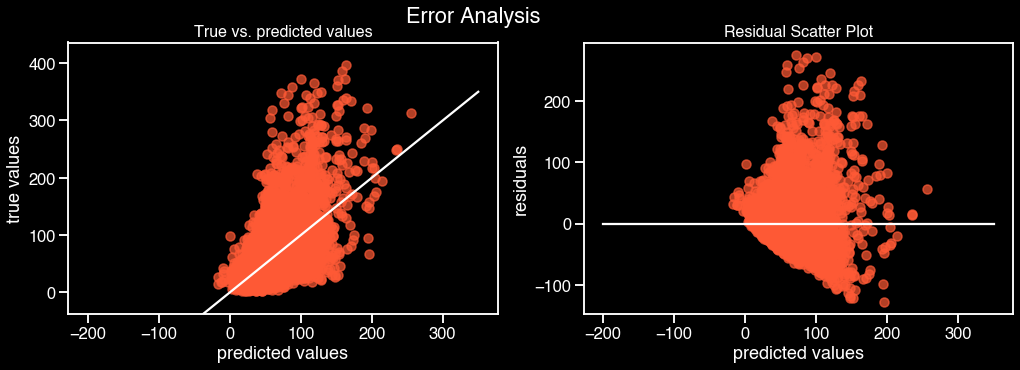

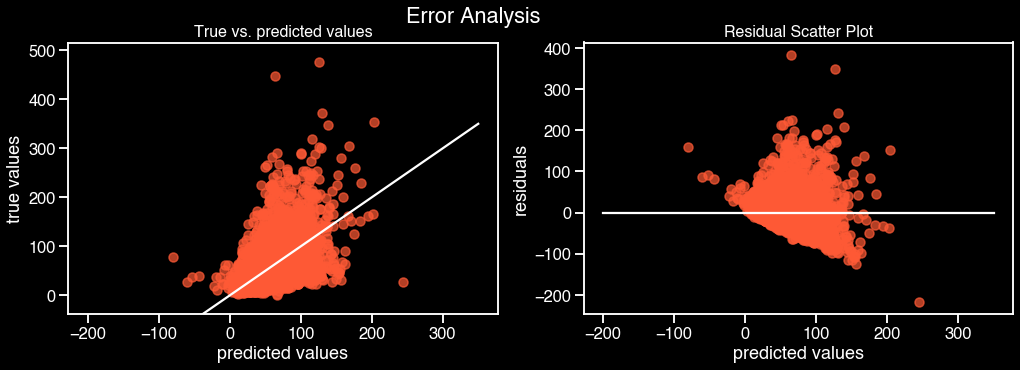

In [27]:

rsme_poly2_train = rmse(y_train, y_pred_train)
rsme_poly2_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_poly2_train:.2f}')
print(f'RSME _ test: {rsme_poly2_test:.2f}')

# error analysis train
print('train')
error_analysis(y_train, y_pred_train)
print('test')
error_analysis(y_test, y_pred_test)

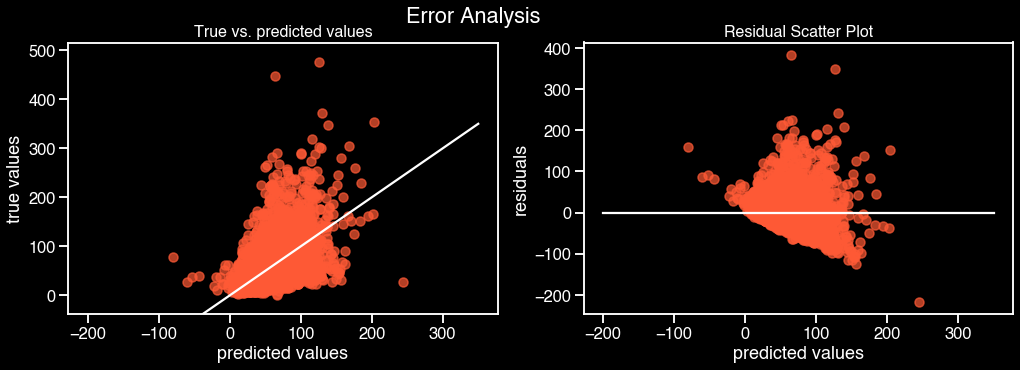

In [28]:
error_analysis(y_test, y_pred_test)

In [29]:
# here we will add the second degree polynomial features
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly_train = polynomial_features.fit_transform(X_train)   # shape (20,2) # x , x2
x_poly_test = polynomial_features.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)
y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

RSME _ train: 22.93
RSME _ test: 70.96


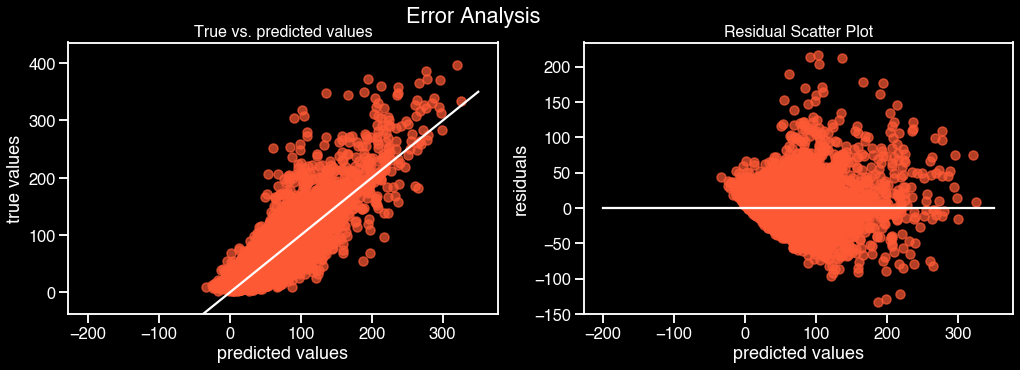

In [30]:
rsme_poly3_train = rmse(y_train, y_pred_train)
rsme_poly3_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_poly3_train:.2f}')
print(f'RSME _ test: {rsme_poly3_test:.2f}')

# error analysis train:hh
error_analysis(y_train, y_pred_train)

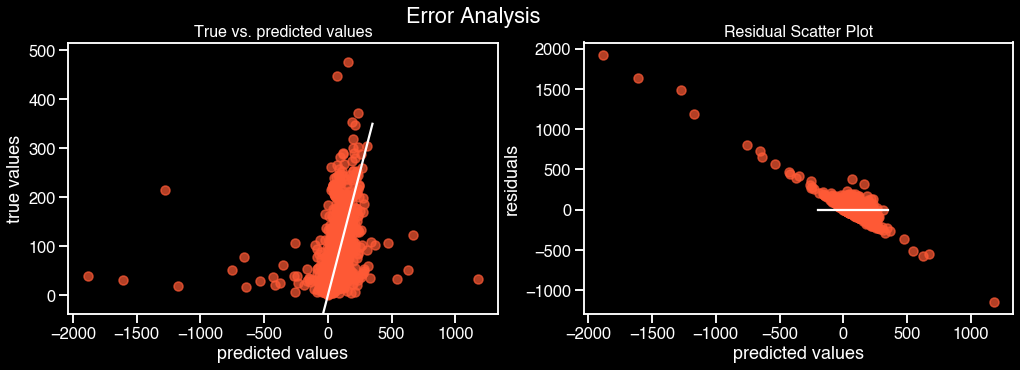

In [31]:
error_analysis(y_test, y_pred_test)

### polynom 2 with lasso 

In [32]:
# here we will add the second degree polynomial features
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = polynomial_features.fit_transform(X_train)   # shape (20,2) # x , x2
x_poly_test = polynomial_features.transform(X_test)

model_poly = Lasso()
model_poly.fit(x_poly_train, y_train)
y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

/Users/valentina/ds/airquality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.778e+06, tolerance: 1.962e+03
  model = cd_fast.enet_coordinate_descent(


RSME _ train: 37.51
RSME _ test: 37.64


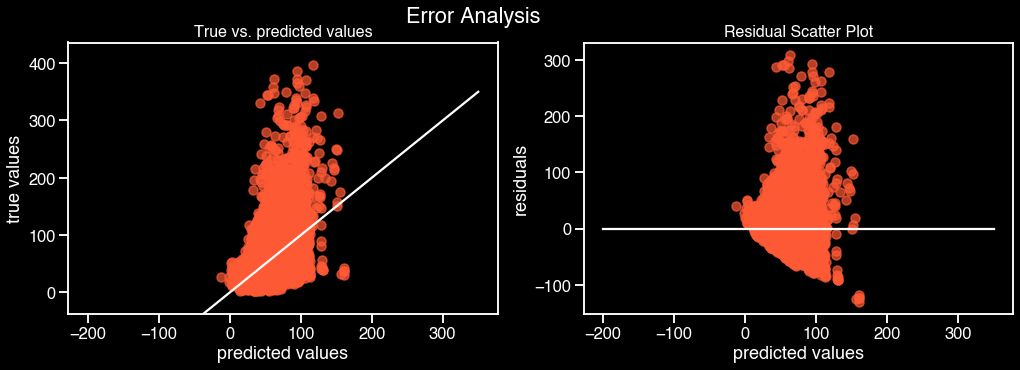

In [33]:

rsme_poly2_l_train = rmse(y_train, y_pred_train)
rsme_poly2_l_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_poly2_l_train:.2f}')
print(f'RSME _ test: {rsme_poly2_l_test:.2f}')

# error analysis train:hh
error_analysis(y_train, y_pred_train)

# EDA on features

In [34]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,2,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
2,0,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,...,0.342484,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833
3,0,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,...,0.336701,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000
4,0,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,...,0.181690,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833


In [35]:
"""for i, col in enumerate(train.columns):
    plt.figure()
    sns.histplot(data = train, x = col)"""

'for i, col in enumerate(train.columns):\n    plt.figure()\n    sns.histplot(data = train, x = col)'

convert precip to log

In [36]:
#train['log_mean_precip'] = train['mean_precip'].apply(np.log1p)	

In [37]:
#sns.histplot(data = data, x='log_mean_precip')

### linreg with log_mean_precip instead of mean_prec

In [38]:
"""columns_to_drop = ['target', 'mean_precip']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')"""

"columns_to_drop = ['target', 'mean_precip']\n# define features and target\nX = train.drop(columns_to_drop, axis=1)\ny = train.target\n\n# test train split: \nX_train, X_test, y_train, y_test = train_test_split(  \n                                    X, y, test_size = 0.3, random_state = 100) \n\nprint (f'X: {X.shape}')\nprint (f'y: {y.shape}')\n\nprint (f'X_train: {X_train.shape}')\nprint (f'y_train: {y_train.shape}')\n\nprint (f'X_test: {X_test.shape}')\nprint (f'y_test: {y_test.shape}')"

In [39]:

# Instantiate our model 
lin_reg = LinearRegression()

"""# Train the model using our data
lin_reg.fit(X_train, y_train)


# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# RSME
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)"""

"# Train the model using our data\nlin_reg.fit(X_train, y_train)\n\n\n# predict\n\ny_pred_train = lin_reg.predict(X_train)\ny_pred_test = lin_reg.predict(X_test)\n\n# RSME\nrsme_lin_reg_train = rmse(y_train, y_pred_train )\nrsme_lin_reg_test = rmse(y_test, y_pred_test )\n\nprint(f'RSME _ train: {rsme_lin_reg_train:.2f}')\nprint(f'RSME _ test: {rsme_lin_reg_test:.2f}')\n\n# error analysis train:\nerror_analysis(y_train, y_pred_train)"

### linear regression with cat precipitation

In [40]:
def rain(x):
    if x == 0: return 0
    else: return 1

train['rain'] = train['mean_precip'].apply(lambda x : rain(x))
train.head()

NameError: name 'train' is not defined

In [ ]:
columns_to_drop = ['target', 'mean_precip', 'log_mean_precip']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

In [ ]:
X_train.head()

In [ ]:

# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X_train, y_train)


# predict

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# RSME
rsme_lin_reg_train = rmse(y_train, y_pred_train )
rsme_lin_reg_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_lin_reg_train:.2f}')
print(f'RSME _ test: {rsme_lin_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)

In [ ]:
### lasso 

In [ ]:
from sklearn.linear_model import Lasso

# Instantiate our model 
lasso_reg = Lasso()

# Train the model using our data
lasso_reg.fit(X_train, y_train)

# predict

y_pred_train = lasso_reg.predict(X_train)
y_pred_test = lasso_reg.predict(X_test)

rsme_lasso_reg_train = rmse(y_train, y_pred_train)
rsme_lasso_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_lasso_reg_train:.2f}')
print(f'RSME _ test: {rsme_lasso_reg_test:.2f}')

# error analysis train:
error_analysis(y_train, y_pred_train)
